Kelompok :
1. Muhammad Daffa Ferdiansyah (1301200076)
2. Muhammad Naufal (1301204134)

In [ ]:
!gdown --id 153pqz0gNo81AJpwjv4wNvxmJkrJGECua
!gdown --id 1NEi7maB7JAR-JnRTeQQoG8tu7OG3R5kQ
!gdown --id 1Le4113bC9lGKGjo9rwV5qpsDtVbZF5ip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=153pqz0gNo81AJpwjv4wNvxmJkrJGECua
To: /content/seg_pred.zip
100% 108M/108M [00:03<00:00, 32.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NEi7maB7JAR-JnRTeQQoG8tu7OG3R5kQ
To: /content/seg_train.zip
100% 209M/209M [00:07<00:00, 29.5MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?

In [ ]:
!pip install torch-summary
!pip install -U -q torch_snippets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 106.8 MB/s eta 

In [ ]:
import torch
from torch import nn
import torchvision
import seaborn as sns
from torch.nn import functional as F
device = 'cuda' if torch.cuda.is_available() else 'cpu'
from torch.utils.data import Dataset, DataLoader
from torch_snippets import *
from torchvision import transforms
from PIL import Image
from torchsummary import summary
from torchvision import transforms,models,datasets

import random
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import zipfile

In [ ]:
class CustomDataset(Dataset):
    def __init__(self , transform , root_dir , split = 'Training' ):
        self.root_dir = os.path.join(root_dir , split)
        self.categories = os.listdir(self.root_dir)
        self.transform = transform
        self.split = split
        self.data = self.load_data()

    def load_data(self):
        data = []
        for i , category in enumerate(self.categories):
            category_path = os.path.join(self.root_dir , category)
            for file_name in os.listdir(category_path):
                img_path = os.path.join(category_path , file_name)
                data.append([img_path , i])
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self , idx):
        img_path , label = self.data[idx]
        image = Image.open(img_path).convert("RGB")
        label = torch.tensor(label)
        if self.transform:
            image = self.transform(image)
        else :
            image = transforms.ToTensor()(image)

        return image.to(device) , label.to(device)

In [ ]:
local_zip = '/content/seg_pred.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/dataset')
zip_ref.close()

In [ ]:
local_zip = '/content/seg_train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/dataset')
zip_ref.close()

In [ ]:
local_zip = '/content/seg_test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/dataset')
zip_ref.close()

In [ ]:
ROOT_DIR = 'dataset/'

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456, 0.406],std=[0.229, 0.224, 0.225]),
])

train_dataset = CustomDataset(transform , root_dir=ROOT_DIR, split='/dataset/seg_train')
test_dataset = CustomDataset(transform, root_dir=ROOT_DIR, split='/dataset/seg_test')

In [ ]:
int2id = {0 : 'mountain', 1 : 'street', 2: 'buildings', 3 :'sea', 4 : 'forest', 5: 'glacier' }

In [ ]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
model = Imodel = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
model.fc = nn.Sequential(nn.Flatten(),
                        nn.Linear(512, 128),
                        nn.ReLU(),
                        nn.Dropout(0.2),
                        nn.Linear(128, len(int2id)))
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 56.0MB/s]


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
optimizer = torch.optim.Adam(model.parameters() , lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
num_epochs = 20
best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs , 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():

        for batch_idx, (inputs, labels) in enumerate(val_loader):
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs , 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2%}, '
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2%}')

Epoch [1/20], Training Loss: 114.4742, Training Accuracy: 81.72%, Validation Loss: 14.9902, Validation Accuracy: 
88.60%

Epoch [2/20], Training Loss: 76.8951, Training Accuracy: 87.25%, Validation Loss: 13.1973, Validation Accuracy: 
89.53%

Epoch [3/20], Training Loss: 71.6233, Training Accuracy: 87.87%, Validation Loss: 13.0967, Validation Accuracy: 
89.43%

Epoch [4/20], Training Loss: 68.7532, Training Accuracy: 88.46%, Validation Loss: 13.7592, Validation Accuracy: 
88.73%

Epoch [5/20], Training Loss: 64.8766, Training Accuracy: 89.09%, Validation Loss: 14.8766, Validation Accuracy: 
87.80%

Epoch [6/20], Training Loss: 63.2463, Training Accuracy: 89.35%, Validation Loss: 12.9294, Validation Accuracy: 
89.83%

Epoch [7/20], Training Loss: 63.0766, Training Accuracy: 89.13%, Validation Loss: 12.2239, Validation Accuracy: 
89.33%

Epoch [8/20], Training Loss: 61.1138, Training Accuracy: 89.51%, Validation Loss: 12.7531, Validation Accuracy: 
90.50%

Epoch [9/20], Training Loss: 59.9840, Training Accuracy: 89.74%, Validation Loss: 12.4641, Validation Accuracy: 
90.20%

Epoch [10/20], Training Loss: 58.6194, Training Accuracy: 89.86%, Validation Loss: 13.2418, Validation Accuracy: 
89.27%

Epoch [11/20], Training Loss: 58.6333, Training Accuracy: 89.85%, Validation Loss: 12.4593, Validation Accuracy: 
89.67%

Epoch [12/20], Training Loss: 59.3924, Training Accuracy: 90.02%, Validation Loss: 11.6456, Validation Accuracy: 
90.40%

Epoch [13/20], Training Loss: 58.0511, Training Accuracy: 90.09%, Validation Loss: 11.8916, Validation Accuracy: 
90.37%

Epoch [14/20], Training Loss: 54.5667, Training Accuracy: 90.79%, Validation Loss: 12.7946, Validation Accuracy: 
90.30%

Epoch [15/20], Training Loss: 54.0000, Training Accuracy: 90.69%, Validation Loss: 11.7302, Validation Accuracy: 
90.10%

Epoch [16/20], Training Loss: 55.1959, Training Accuracy: 90.27%, Validation Loss: 11.8882, Validation Accuracy: 
90.00%

Epoch [17/20], Training Loss: 53.5672, Training Accuracy: 90.56%, Validation Loss: 11.6407, Validation Accuracy: 
90.07%

Epoch [18/20], Training Loss: 54.0274, Training Accuracy: 90.92%, Validation Loss: 11.4049, Validation Accuracy: 
90.37%

Epoch [19/20], Training Loss: 52.0186, Training Accuracy: 91.07%, Validation Loss: 11.7272, Validation Accuracy: 
90.83%

Epoch [20/20], Training Loss: 53.2344, Training Accuracy: 91.20%, Validation Loss: 11.4631, Validation Accuracy: 
91.17%

Text(0.5, 1.0, 'Training and validation loss')

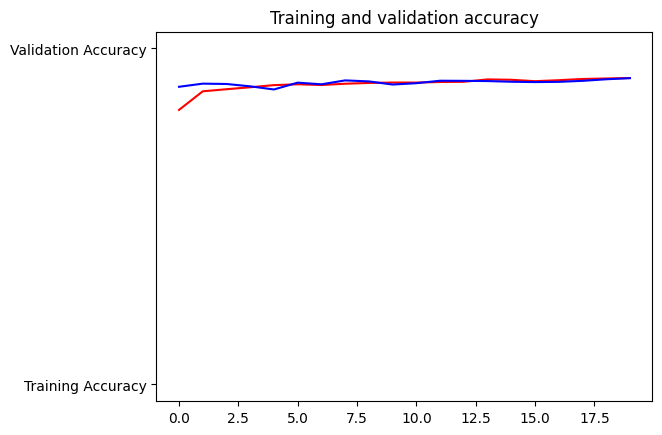

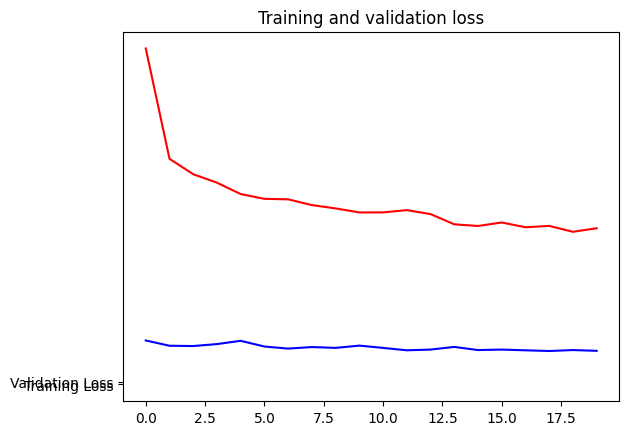

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------

acc=train_accuracies
val_acc=val_accuracies
loss=train_losses
val_loss=val_losses

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')